**Importer les librairies**

In [ ]:
!pip install scipy matplotlib tensorflow scikit-learn
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

**Charger le dataset B0006**

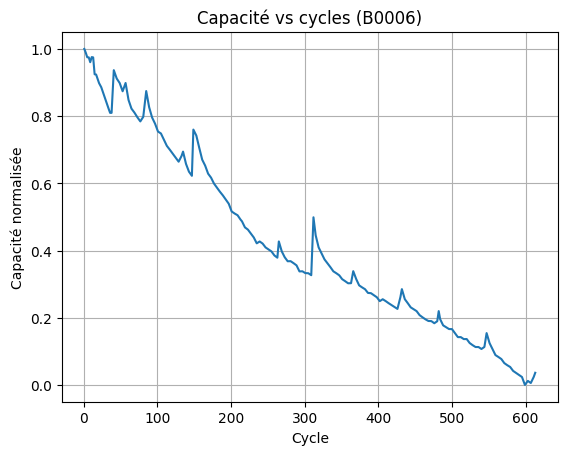

In [ ]:
# Charger le dataset
mat = scipy.io.loadmat("B0006.mat")
B0006 = mat['B0006'][0][0]

# Extraction des cycles
cycles = B0006['cycle'][0]

capacity = []
cycle_number = []

for i, c in enumerate(cycles):
    if c['type'][0] == 'discharge':
        capacity.append(c['data'][0][0]['Capacity'][0][0])
        cycle_number.append(i)

capacity = np.array(capacity)
cycle_number = np.array(cycle_number)

# Normalisation
capacity_norm = (capacity - capacity.min()) / (capacity.max() - capacity.min())

plt.plot(cycle_number, capacity_norm)
plt.xlabel("Cycle")
plt.ylabel("Capacité normalisée")
plt.title("Capacité vs cycles (B0006)")
plt.grid()
plt.show()


Préparer les **séquences**

In [ ]:
seq_len = 10
X, Y = [], []

for i in range(len(capacity_norm) - seq_len):
    X.append(capacity_norm[i:i+seq_len])
    Y.append(capacity_norm[i+seq_len])

X = np.array(X)
Y = np.array(Y)

# Reshape pour [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
print("X shape:", X.shape, " Y shape:", Y.shape)


X shape: (158, 10, 1)  Y shape: (158,)


In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]


In [ ]:
model_lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_len, 1)),
    Dense(1)
])

model_lstm.compile(optimizer=Adam(0.005), loss='mse')
history_lstm = model_lstm.fit(X_train, Y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.1065 - val_loss: 0.0040
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130 - val_loss: 0.0016
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0074 - val_loss: 0.0125
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0041 - val_loss: 0.0057
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0020 - val_loss: 6.5771e-04
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019 - val_loss: 3.1172e-04
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0015 - val_loss: 3.1988e-04
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0012 - val_loss: 3.2017e-04
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss:

In [ ]:
model_gru = Sequential([
    GRU(50, activation='tanh', input_shape=(seq_len, 1)),
    Dense(1)
])

model_gru.compile(optimizer=Adam(0.005), loss='mse')
history_gru = model_gru.fit(X_train, Y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 0.0555 - val_loss: 0.0012
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - val_loss: 0.0053
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030 - val_loss: 5.1436e-04
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0016 - val_loss: 2.6509e-04
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0015 - val_loss: 3.9760e-04
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0015 - val_loss: 3.9962e-04
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0012 - val_loss: 2.5977e-04
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0012 - val_loss: 4.3559e-04
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0010 - val_loss: 2.7077e-04
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
LSTM -> MAE: 0.0467, RMSE: 0.0490, R²: 0.1137
GRU -> MAE: 0.0085, RMSE: 0.0128, R²: 0.9396


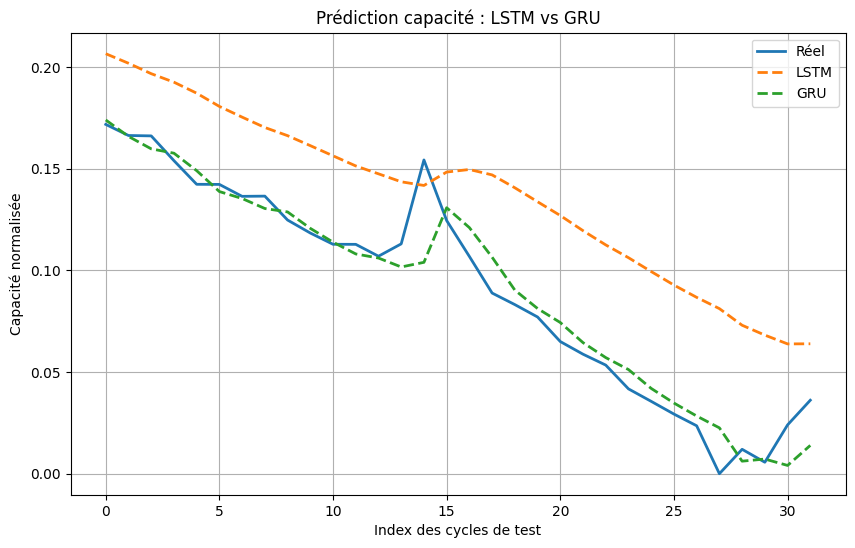

In [ ]:
# Prédictions
y_pred_lstm = model_lstm.predict(X_test).flatten()
y_pred_gru = model_gru.predict(X_test).flatten()

# Métriques
def evaluate(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return mae, rmse, r2

evaluate(Y_test, y_pred_lstm, "LSTM")
evaluate(Y_test, y_pred_gru, "GRU")

# Visualisation
plt.figure(figsize=(10,6))
plt.plot(Y_test, label="Réel", linewidth=2)
plt.plot(y_pred_lstm, '--', label="LSTM", linewidth=2)
plt.plot(y_pred_gru, '--', label="GRU", linewidth=2)
plt.legend()
plt.xlabel("Index des cycles de test")
plt.ylabel("Capacité normalisée")
plt.title("Prédiction capacité : LSTM vs GRU")
plt.grid()
plt.show()


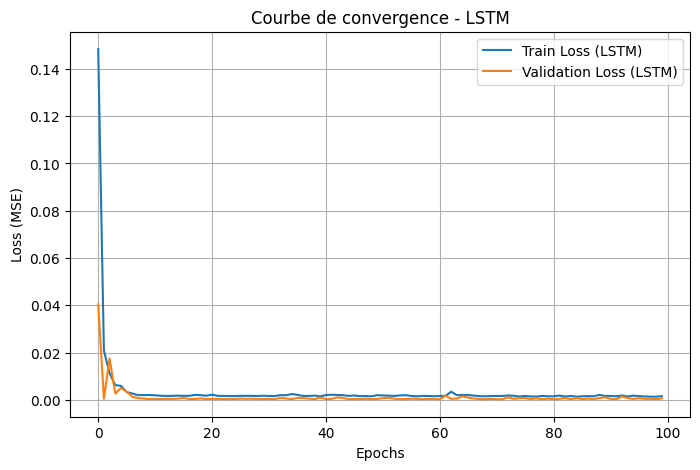

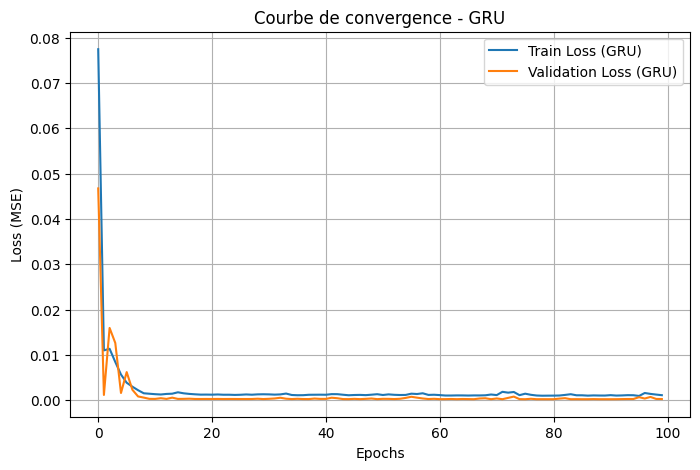

In [ ]:
# Courbe de loss pour LSTM
plt.figure(figsize=(8,5))
plt.plot(history_lstm.history['loss'], label='Train Loss (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss (LSTM)')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Courbe de convergence - LSTM")
plt.legend()
plt.grid()
plt.show()

# Courbe de loss pour GRU
plt.figure(figsize=(8,5))
plt.plot(history_gru.history['loss'], label='Train Loss (GRU)')
plt.plot(history_gru.history['val_loss'], label='Validation Loss (GRU)')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Courbe de convergence - GRU")
plt.legend()
plt.grid()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
RUL réel = 114 cycles
RUL LSTM = 102 cycles
RUL GRU  = 101 cycles


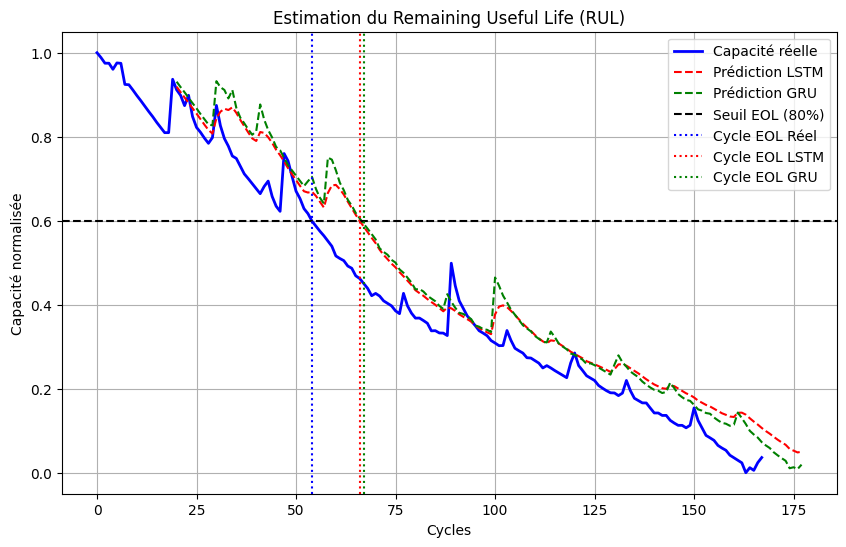

In [ ]:
# Seuil de fin de vie (80% de la capacité initiale normalisée = 0.8 en échelle normalisée)
EOL_threshold = 0.8

# Trouver le cycle de fin de vie réel
true_EOL = np.where(capacity_norm <= EOL_threshold)[0][0]

# Prédictions complètes (sur tout X)
y_pred_full_lstm = model_lstm.predict(X).flatten()
y_pred_full_gru  = model_gru.predict(X).flatten()

# Cycle estimé EOL par modèle
pred_EOL_lstm = np.where(y_pred_full_lstm <= EOL_threshold)[0][0] + seq_len
pred_EOL_gru  = np.where(y_pred_full_gru <= EOL_threshold)[0][0] + seq_len

print(f"RUL réel = {len(capacity_norm) - true_EOL} cycles")
print(f"RUL LSTM = {len(capacity_norm) - pred_EOL_lstm} cycles")
print(f"RUL GRU  = {len(capacity_norm) - pred_EOL_gru} cycles")

# Visualisation de la prédiction RUL
plt.figure(figsize=(10,6))
plt.plot(capacity_norm, 'b', label="Capacité réelle", linewidth=2)
plt.plot(range(seq_len, seq_len+len(y_pred_full_lstm)), y_pred_full_lstm, 'r--', label="Prédiction LSTM")
plt.plot(range(seq_len, seq_len+len(y_pred_full_gru)), y_pred_full_gru, 'g--', label="Prédiction GRU")
plt.axhline(EOL_threshold, color='k', linestyle='--', label="Seuil EOL (80%)")
plt.axvline(true_EOL, color='b', linestyle=':', label="Cycle EOL Réel")
plt.axvline(pred_EOL_lstm, color='r', linestyle=':', label="Cycle EOL LSTM")
plt.axvline(pred_EOL_gru, color='g', linestyle=':', label="Cycle EOL GRU")
plt.xlabel("Cycles")
plt.ylabel("Capacité normalisée")
plt.title("Estimation du Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()
